## Soup EDA

In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse
import anndata

In [3]:
## import utils
cwd = '../utils/'
sys.path.append(cwd)

import genes
import panfetal_utils

# import ti_utils

In [4]:
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging

Some soupy genes are detected in DGE analysis: is this sample specific or not?

### Load data

In [5]:
merged_raw = sc.read_h5ad('/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.wGut.h5ad', backed="r")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [17]:
def _rename_gut_cells(x):
    if "FCA" not in x:
        x = x.split("_")[8].split('-')[1] + "-1"  + "_" + "_".join(x.split("_")[3:6])
    else: 
        x = x.split("_")[7].split('-')[1] + "-1" + "_" + "_".join(x.split("_")[3:5]) 
    return(x)

obs_names = merged_raw.obs_names.values
gut_ixs = np.where(merged_raw.obs.organ=="GU")[0]
for i in gut_ixs:
    obs_names[i] = _rename_gut_cells(obs_names[i])

merged_raw.obs_names = obs_names

In [8]:
adata_obs = pd.read_csv('/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.wGut.batchCorrected_20210118.full_obs.annotated.csv', index_col=0)

In [19]:
merged_raw = merged_raw[adata_obs.index]
# adata_obs.loc[]

/home/jovyan/my-conda-envs/emma_env/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [20]:
merged_raw.obs = adata_obs

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


### Subset by organ

In [50]:
adata_li = merged_raw[merged_raw.obs["organ"]=="LI"]
adata_sk = merged_raw[merged_raw.obs["organ"]=="SK"]

/home/jovyan/my-conda-envs/emma_env/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [51]:
adata_li.var_names_make_unique()
adata_sk.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [39]:
age_orderd_samples = adata_li.obs[["age","Sample"]].sort_values("age")["Sample"].unique()
sort_orderd_samples = adata_li.obs[['Sort_id',"Sample"]].sort_values('Sort_id')["Sample"].unique()

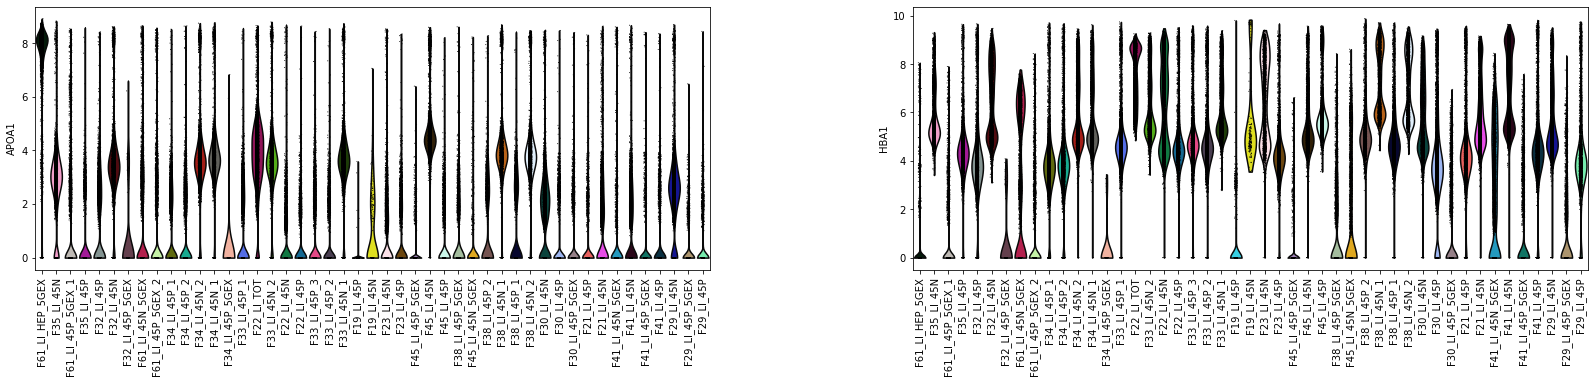

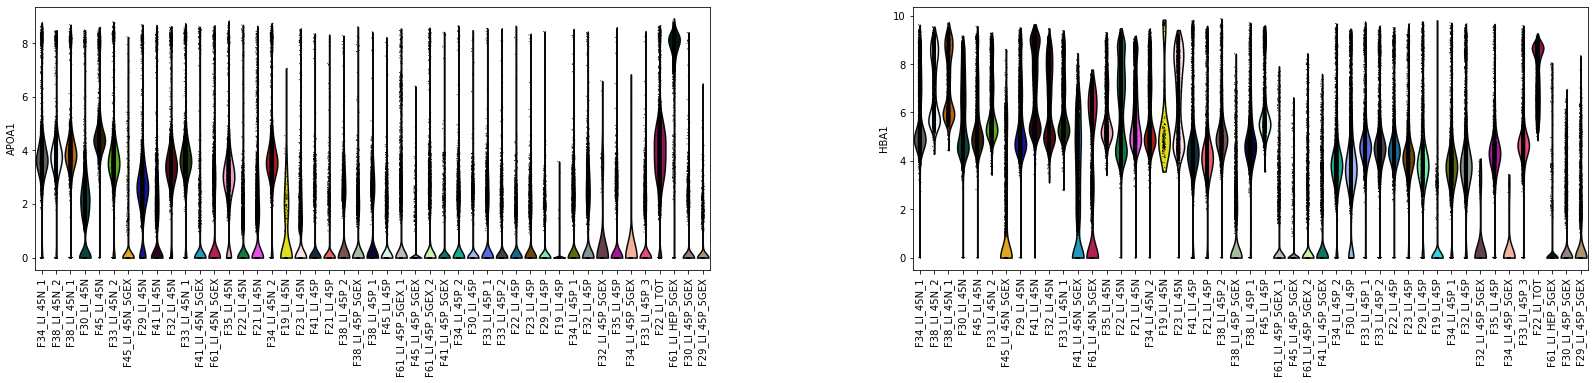

In [43]:
plt.rcParams["figure.figsize"] = [10,5]
sc.pl.violin(adata_li,["APOA1","HBA1"] ,groupby="Sample", rotation=90, order=age_orderd_samples)
sc.pl.violin(adata_li,["APOA1","HBA1"] ,groupby="Sample", rotation=90, order=sort_orderd_samples)

In [46]:
age_orderd_samples = adata_sk.obs[["age","Sample"]].sort_values("age")["Sample"].unique()
sort_orderd_samples = adata_sk.obs[['Sort_id',"Sample"]].sort_values('Sort_id')["Sample"].unique()

... storing 'Sample' as categorical
... storing 'donor' as categorical
... storing 'organ' as categorical
... storing 'file' as categorical
... storing 'predicted_doublets' as categorical
... storing 'name' as categorical
... storing 'batch' as categorical
... storing 'bbk' as categorical
... storing 'uniform_label' as categorical
... storing 'uniform_label_expanded_merged' as categorical
... storing 'uniform_label_lvl0' as categorical
... storing 'Sample.lanes' as categorical
... storing 'Sort_id' as categorical
... storing 'method' as categorical
... storing 'sex' as categorical
... storing 'Processing_method' as categorical
... storing 'AnnatomicalPart' as categorical
... storing 'anno_lvl_1_LYMPHOID' as categorical
... storing 'anno_lvl_2_LYMPHOID' as categorical
... storing 'anno_lvl_1_MYELOID' as categorical
... storing 'anno_lvl_2_MYELOID' as categorical
... storing 'anno_lvl_1_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_MEM_PROGENITORS' as categorical


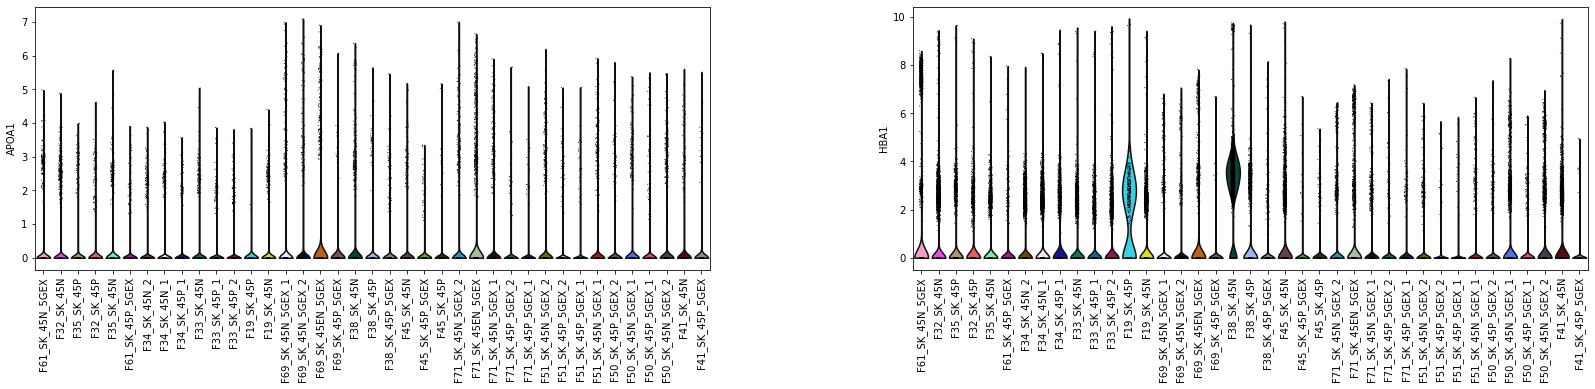

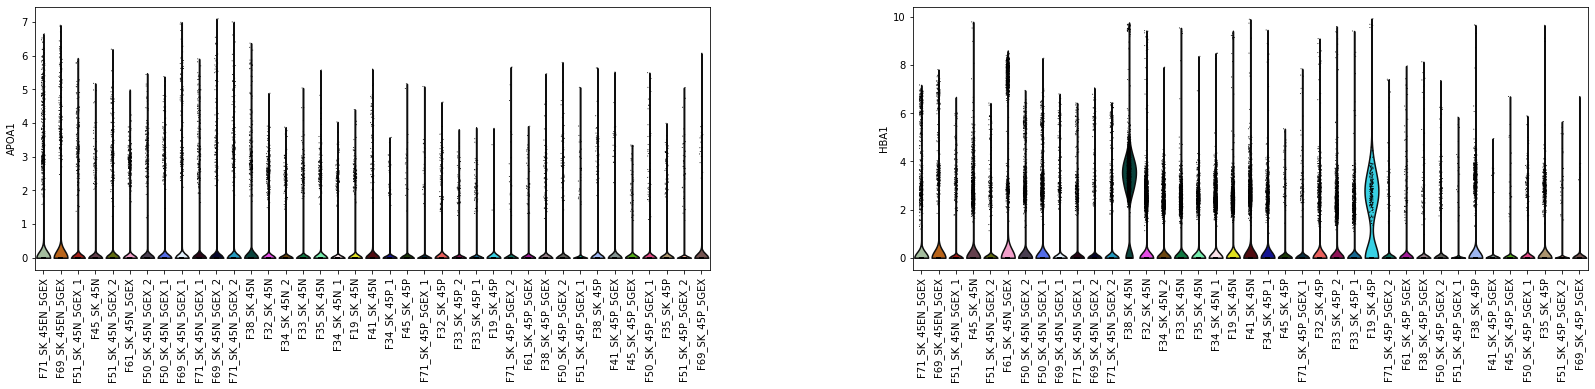

In [47]:
plt.rcParams["figure.figsize"] = [10,5]
sc.pl.violin(adata_sk,["APOA1","HBA1"] ,groupby="Sample", rotation=90, order=age_orderd_samples)
sc.pl.violin(adata_sk,["APOA1","HBA1"] ,groupby="Sample", rotation=90, order=sort_orderd_samples)

/home/jovyan/my-conda-envs/emma_env/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


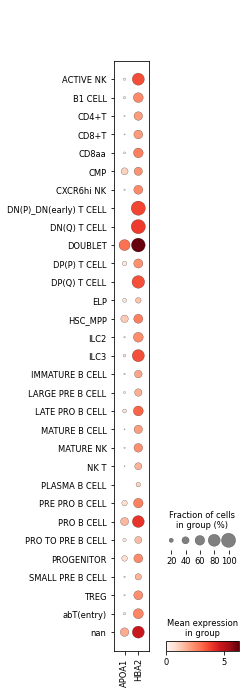

/home/jovyan/my-conda-envs/emma_env/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


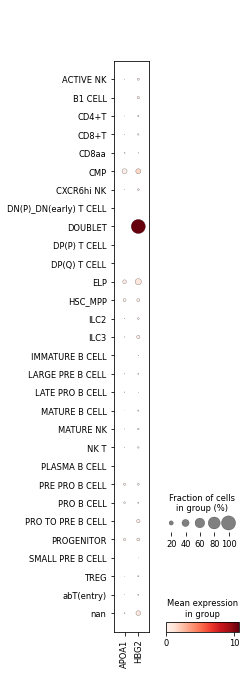

In [54]:
sc.pl.dotplot(adata_li, ["APOA1","HBA2"], groupby="anno_lvl_2_LYMPHOID")
sc.pl.dotplot(adata_sk, ["APOA1","HBG2"], groupby="anno_lvl_2_LYMPHOID")